## Imports

In [ ]:
import os, sys, math
import numpy as np
from matplotlib import pyplot as plt
if 'google.colab' in sys.modules: 
  %tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE 

Tensorflow version 2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Run this when all work is done
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/content/drive/MyDrive/dataset/ext_mri_ResNet152V2_Prostate.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 84,022,530
Trainable params: 25,690,882
Non-trainable params: 58,331,648
_________________________________________________________________


In [ ]:
extract = tf.keras.Model(new_model.inputs, new_model.layers[-2].output)
print(extract.input_shape)
print(extract.output_shape)

(None, 224, 224, 3)
(None, 256)


In [ ]:
def decode_jpeg_and_label(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  label = tf.strings.split(tf.expand_dims(filename, axis=-1), sep='/')
  print(label)
  label = label.values[-2]
  print('Label',label)
  return image, label

In [ ]:
data, label = decode_jpeg_and_label('/tmp/Prostate/malignant/malignant_1006.JPG')
#print(data)
print(label)
print(data.shape)

<tf.RaggedTensor [[b'', b'tmp', b'Prostate', b'malignant', b'malignant_1006.JPG']]>
Label tf.Tensor(b'malignant', shape=(), dtype=string)
tf.Tensor(b'malignant', shape=(), dtype=string)
(224, 224, 3)


In [ ]:
import numpy as np
#arrs = [np.random.random((224, 224, 3))
#        for i in range(1)]

arrs = [data for i in range(1)]

print(len(arrs))
print(arrs[0].shape)

1
(224, 224, 3)


In [ ]:
res = np.concatenate([arr[np.newaxis] for arr in arrs])
res.shape

(1, 224, 224, 3)

In [ ]:
features = extract.predict(res)
print(features)

[[   0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.      1053.9558     0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
   429.45956    0.         0.         0.         0.         0.
  1270.5538     0.         0.         0.         0.    

In [ ]:
#X = features.reshape(-1)
#print(X.shape)
#print(X)
X = tf.keras.utils.normalize(X, axis=-1, order=2)
print(X[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.23021464 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.1051059  0.         0.         0.         0.         0.
 0.24705562 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
print(features)

[[    0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.       10269.153
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.           0.           0.           0.
      0.           0.

In [ ]:
%cp /content/drive/MyDrive/dataset/benign_images_mri_extended.zip /tmp
%cp /content/drive/MyDrive/dataset/malignant_images_mri_extended.zip /tmp

In [ ]:
%mkdir /tmp/Prostate

In [ ]:
!unzip /tmp/benign_images_mri_extended.zip -d /tmp/Prostate
!unzip /tmp/malignant_images_mri_extended.zip -d /tmp/Prostate

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4059.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_406.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4060.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4061.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4062.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4063.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4064.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4065.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4066.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4067.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4068.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_4069.JPG  
  inflating: /tmp/Prostate/benign_images_mri_extended/benign_407.JPG  
  inflating: /t

## Configuration

In [ ]:
%mkdir /tmp/prostate_tfrecords

In [ ]:
%mv /tmp/Prostate/benign_images_mri_extended /tmp/Prostate/benign
%mv /tmp/Prostate/malignant_images_mri_extended /tmp/Prostate/malignant

In [ ]:
GCS_PATTERN = '/tmp/Prostate/*/*.JPG'
GCS_OUTPUT = '/tmp/prostate_tfrecords/prostate'  # prefix for output file names
SHARDS = 16
TARGET_SIZE = [224, 224]

CLASSES = [b'benign', b'malignant'] # do not change, maps to the labels in the data (folder names)
print(CLASSES)

[b'benign', b'malignant']


In [ ]:
def display_9_images_from_dataset(dataset):
  plt.figure(figsize=(13,13))
  subplot=331
  for i, (image, label) in enumerate(dataset):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image.numpy().astype(np.uint8))
    plt.title(label.numpy().decode("utf-8"), fontsize=16)
    subplot += 1
    if i==8:
      break
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()

## Read images and labels

In [ ]:
print(GCS_PATTERN)
nb_images = len(tf.io.gfile.glob(GCS_PATTERN))
print(nb_images)
shard_size = math.ceil(1.0 * nb_images / SHARDS)
print(shard_size)
print("Pattern matches {} images which will be rewritten as {} .tfrec files containing {} images each.".format(nb_images, SHARDS, shard_size))

def decode_jpeg_and_label(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  label = tf.strings.split(tf.expand_dims(filename, axis=-1), sep='/')
  print(label)
  label = label.values[-2]
  print('Label',label)
  return image, label

filenames = tf.data.Dataset.list_files(GCS_PATTERN, seed=10655) # This also shuffles the images
dataset1 = filenames.map(decode_jpeg_and_label, num_parallel_calls=AUTO)
print(shard_size)

/tmp/Prostate/*/*.JPG
8398
525
Pattern matches 8398 images which will be rewritten as 16 .tfrec files containing 525 images each.
tf.RaggedTensor(values=Tensor("StringSplit/StringSplitV2:1", shape=(None,), dtype=string), row_splits=Tensor("StringSplit/RaggedFromValueRowIds/RowPartitionFromValueRowIds/concat:0", shape=(None,), dtype=int64))
Label Tensor("strided_slice:0", shape=(), dtype=string)
525


In [ ]:
type(dataset1)
print(dataset1)

<ParallelMapDataset shapes: ((None, None, None), ()), types: (tf.uint8, tf.string)>


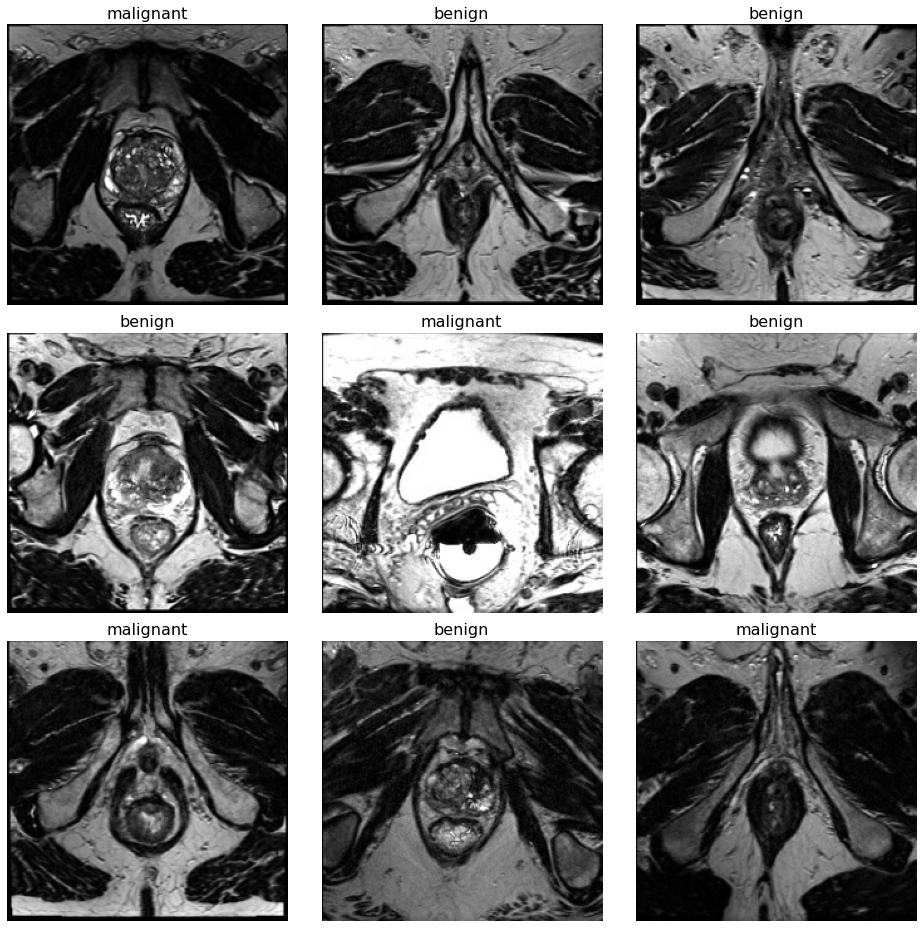

In [ ]:
display_9_images_from_dataset(dataset1)

## Resize and crop images to common size
No need to study the code in this cell. It's only image resizing.

In [ ]:
def resize_and_crop_image(image, label):
  # Resize and crop using "fill" algorithm:
  # always make sure the resulting image
  # is cut out from the source image so that
  # it fills the TARGET_SIZE entirely with no
  # black bars and a preserved aspect ratio.
  w = tf.shape(image)[0]
  h = tf.shape(image)[1]
  tw = TARGET_SIZE[1]
  th = TARGET_SIZE[0]
  resize_crit = (w * th) / (h * tw)
  image = tf.cond(resize_crit < 1,
                  lambda: tf.image.resize(image, [w*tw/w, h*tw/w]), # if true
                  lambda: tf.image.resize(image, [w*th/h, h*th/h])  # if false
                 )
  nw = tf.shape(image)[0]
  nh = tf.shape(image)[1]
  image = tf.image.crop_to_bounding_box(image, (nw - tw) // 2, (nh - th) // 2, tw, th)
  return image, label
  
dataset2 = dataset1.map(resize_and_crop_image, num_parallel_calls=AUTO)  

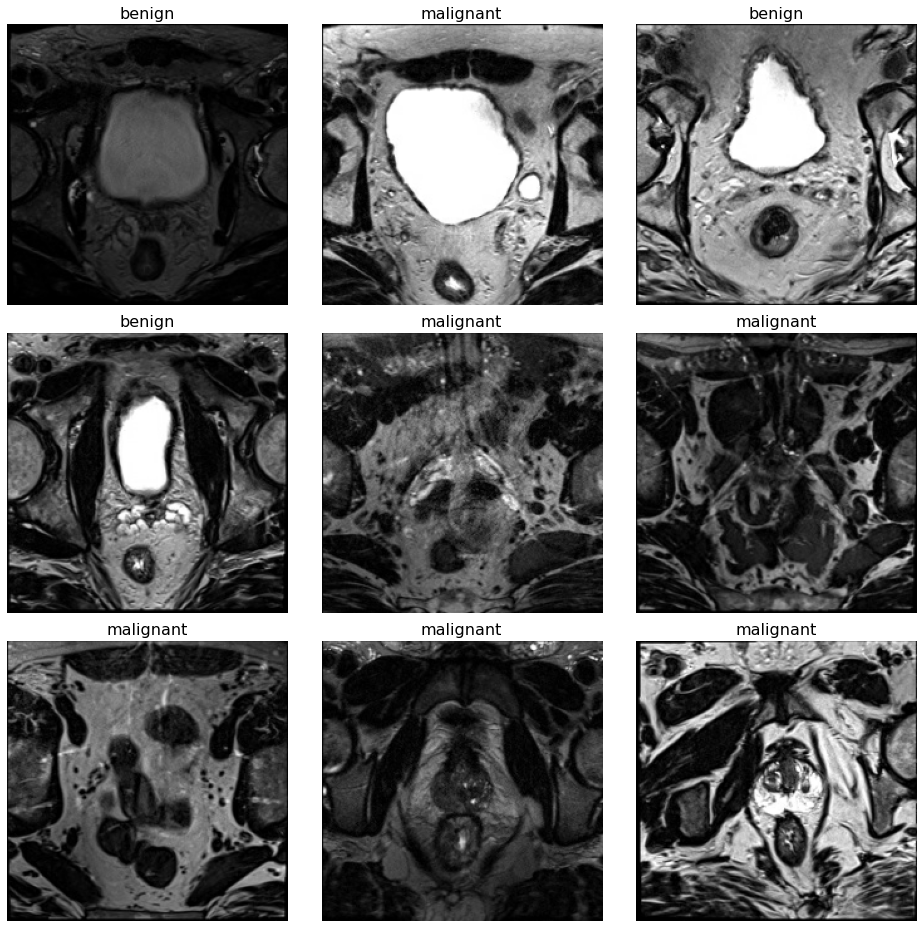

In [ ]:
display_9_images_from_dataset(dataset2)

### Speed test-Slow: Training on thousands of individual files will not work. We have to use the **TFRecord** format to group files together. 

In [ ]:
display_dataset = dataset2.batch(8)
for image, label in display_dataset.take(30):
  print("Image batch shape {}, {})".format(image.numpy().shape, [lbl.decode('utf8') for lbl in label.numpy()]))

Image batch shape (8, 224, 224, 3), ['malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign'])
Image batch shape (8, 224, 224, 3), ['benign', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'benign', 'benign'])
Image batch shape (8, 224, 224, 3), ['benign', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'benign'])
Image batch shape (8, 224, 224, 3), ['malignant', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'benign'])
Image batch shape (8, 224, 224, 3), ['benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign'])
Image batch shape (8, 224, 224, 3), ['benign', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign'])
Image batch shape (8, 224, 224, 3), ['benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant'])
Image batch shape (8, 224, 224, 3), ['malignant', 'benign', 'malignant', 'malignant', 'malignant', 'malignant', 'benign', 'ben

## Recompress the images for bandwidth savings by outweight the decoding CPU cost

In [ ]:
def recompress_image(image, label):
  height = tf.shape(image)[0]
  width = tf.shape(image)[1]
  image = tf.cast(image, tf.uint8)
  image = tf.image.encode_jpeg(image, optimize_size=True, chroma_downsampling=False)
  return image, label, height, width

dataset3 = dataset2.map(recompress_image, num_parallel_calls=AUTO)
dataset3 = dataset3.batch(shard_size) # sharding: there will be one "batch" of images per file 
print(dataset3)

<BatchDataset shapes: ((None,), (None,), (None,), (None,)), types: (tf.string, tf.string, tf.int32, tf.int32)>


## Write dataset as TFRecord files

In [ ]:
# Three types of data can be stored in TFRecords: bytestrings, integers and floats
# They are always stored as lists, a single data element will be a list of size 1

def _bytestring_feature(list_of_bytestrings):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=list_of_bytestrings))

def _int_feature(list_of_ints): # int64
  return tf.train.Feature(int64_list=tf.train.Int64List(value=list_of_ints))

def _float_feature(list_of_floats): # float32
  return tf.train.Feature(float_list=tf.train.FloatList(value=list_of_floats))
  

def to_tfrecord(tfrec_filewriter, img_bytes, label, height, width):  
  class_num = np.argmax(np.array(CLASSES)==label) # (order defined in CLASSES)
  one_hot_class = np.eye(len(CLASSES))[class_num] # [0, 0, 1, 0, 0] for class #2

  feature = {
      "image": _bytestring_feature([img_bytes]), # one image in the list
      "class": _int_feature([class_num]),        # one class in the list
      
      # additional (not very useful) fields to demonstrate TFRecord writing/reading of different types of data
      "label":         _bytestring_feature([label]),          # fixed length (1) list of strings, the text label
      "size":          _int_feature([height, width]),         # fixed length (2) list of ints
      "one_hot_class": _float_feature(one_hot_class.tolist()) # variable length  list of floats, n=len(CLASSES)
  }
  return tf.train.Example(features=tf.train.Features(feature=feature))
  
print("Writing TFRecords")
for shard, (image, label, height, width) in enumerate(dataset3):
  # batch size used as shard size here
  shard_size = image.numpy().shape[0]
  # good practice to have the number of records in the filename
  filename = GCS_OUTPUT + "{:02d}-{}.tfrec".format(shard, shard_size)
  
  with tf.io.TFRecordWriter(filename) as out_file:
    for i in range(shard_size):
      example = to_tfrecord(out_file,
                            image.numpy()[i], # re-compressed image: already a byte string
                            label.numpy()[i],
                            height.numpy()[i],
                            width.numpy()[i])
      out_file.write(example.SerializeToString())
    print("Wrote file {} containing {} records".format(filename, shard_size))

Writing TFRecords
Wrote file /tmp/prostate_tfrecords/prostate00-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate01-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate02-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate03-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate04-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate05-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate06-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate07-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate08-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate09-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate10-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords/prostate11-525.tfrec containing 525 records
Wrote file /tmp/prostate_tfrecords

## Read  from TFRecord Dataset
**Resume running the cells**

In [ ]:
def read_tfrecord(example):
    features = {
        "image": tf.io.FixedLenFeature([], tf.string),  # tf.string = bytestring (not text string)
        "class": tf.io.FixedLenFeature([], tf.int64),   # shape [] means scalar
        
        # additional (not very useful) fields to demonstrate TFRecord writing/reading of different types of data
        "label":         tf.io.FixedLenFeature([], tf.string),  # one bytestring
        "size":          tf.io.FixedLenFeature([2], tf.int64),  # two integers
        "one_hot_class": tf.io.VarLenFeature(tf.float32)        # a certain number of floats
    }
    # decode the TFRecord
    example = tf.io.parse_single_example(example, features)
    
    # FixedLenFeature fields are now ready to use: exmple['size']
    # VarLenFeature fields require additional sparse_to_dense decoding
    
    image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.reshape(image, [*TARGET_SIZE, 3])
    
    class_num = example['class']
    
    label  = example['label']
    height = example['size'][0]
    width  = example['size'][1]
    one_hot_class = tf.sparse.to_dense(example['one_hot_class'])
    return image, class_num, label, height, width, one_hot_class
    
# read from TFRecords. For optimal performance, read from multiple
# TFRecord files at once and set the option experimental_deterministic = False
# to allow order-altering optimizations.

option_no_order = tf.data.Options()
option_no_order.experimental_deterministic = False

filenames = tf.io.gfile.glob(GCS_OUTPUT + "*.tfrec")
dataset4 = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)
dataset4 = dataset4.with_options(option_no_order)
dataset4 = dataset4.map(read_tfrecord, num_parallel_calls=AUTO)
dataset4 = dataset4.shuffle(300)

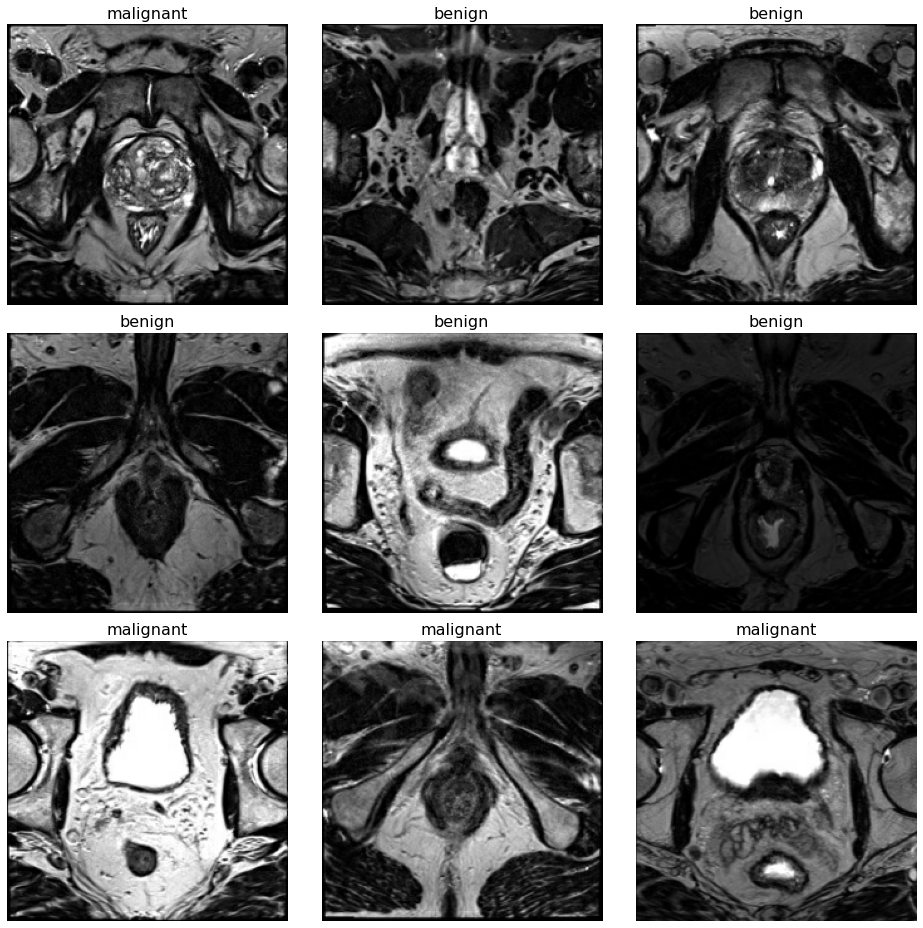

In [ ]:
display_dataset = dataset4.map(lambda image, class_num, label, height, width, one_hot_class: (image, label))
display_9_images_from_dataset(display_dataset)

### Speed test: fast
Loading training data is not a bottleneck anymore

In [ ]:
for image, class_num, label, height, width, one_hot_class in dataset4.take(300):
    print("Image shape {}, {}x{} px, class={} ({:>10}, {})".format(image.numpy().shape, width, height, class_num, label.numpy().decode('utf8'), one_hot_class))

Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=1 ( malignant, [0. 1.])
Image shape (224, 224, 3), 224x224 px, class=1 ( malignant, [0. 1.])
Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=1 ( malignant, [0. 1.])
Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=0 (    benign, [1. 0.])
Image shape (224, 224, 3), 224x224 px, class=1 ( malignant, [0. 1.])
Image shape (224, 224, 3), 224x224

In [ ]:
IMAGE_FILE_LOCATION = '/tmp/Prostate/*/*.JPG'
TF_RECORD_LOCATION = '/tmp/prostate_tfrecords/*.tfrec'

IMAGE_SIZE = [224, 224]

BATCH_SIZE = 64 # 128 works on GPU too but comes very close to the memory limit of the Colab GPU
EPOCHS=12

VALIDATION_SPLIT = 0.20
CLASSES = [b'benign', b'malignant']
NO_OF_CLASSES=len(CLASSES)

total_image_files = len(tf.io.gfile.glob(IMAGE_FILE_LOCATION))

# splitting data files between training and validation
filenames = tf.io.gfile.glob(TF_RECORD_LOCATION)
split = int(len(filenames) * VALIDATION_SPLIT)
training_filenames = filenames[split:]
validation_filenames = filenames[:split]
print("Pattern matches {} data files. Splitting dataset into {} training files and {} validation files".format(len(filenames), len(training_filenames), len(validation_filenames)))
validation_steps = int(total_image_files // len(filenames) * len(validation_filenames)) // BATCH_SIZE
steps_per_epoch = int(total_image_files // len(filenames) * len(training_filenames)) // BATCH_SIZE
print("With a batch size of {}, there will be {} batches per training epoch and {} batch(es) per validation run.".format(BATCH_SIZE, steps_per_epoch, validation_steps))

Pattern matches 16 data files. Splitting dataset into 13 training files and 3 validation files
With a batch size of 64, there will be 106 batches per training epoch and 24 batch(es) per validation run.


In [ ]:
def dataset_to_numpy_util(dataset, N):
  dataset = dataset.batch(N)
  
  for images, labels in dataset:
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    break;

  return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
  correct = (label == correct_label)
  return "{} [{}{}{}]".format(CLASSES[label], str(correct), ', shoud be ' if not correct else '',
                              CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image)
    plt.title(title, fontsize=16, color='red' if red else 'black')
    return subplot+1
  
def display_9_images_from_dataset(dataset):
  subplot=331
  plt.figure(figsize=(13,13))
  images, labels = dataset_to_numpy_util(dataset, 9)
  for i, image in enumerate(images):
    title = CLASSES[labels[i]]
    subplot = display_one_flower(image, title, subplot)
    if i >= 8:
      break;
              
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()
  
def display_9_images_with_predictions(images, predictions, labels):
  subplot=331
  plt.figure(figsize=(13,13))
  classes = np.argmax(predictions, axis=-1)
  for i, image in enumerate(images):
    title, correct = title_from_label_and_target(classes[i], labels[i])
    subplot = display_one_flower(image, title, subplot, not correct)
    if i >= 8:
      break;
              
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()
  
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

In [ ]:
def read_tfrecord(example):
    features = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means scalar
    }
    example = tf.io.parse_single_example(example, features)
    image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE, 3]) # explicit size will be needed for TPU
    class_label = example['class']
    return image, class_label

def load_dataset(filenames):

  option_no_order = tf.data.Options()
  option_no_order.experimental_deterministic = False

  dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)
  dataset = dataset.with_options(option_no_order)
  dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)
  return dataset

['/tmp/prostate_tfrecords/prostate07-525.tfrec', '/tmp/prostate_tfrecords/prostate04-525.tfrec', '/tmp/prostate_tfrecords/prostate01-525.tfrec', '/tmp/prostate_tfrecords/prostate10-525.tfrec', '/tmp/prostate_tfrecords/prostate08-525.tfrec', '/tmp/prostate_tfrecords/prostate03-525.tfrec', '/tmp/prostate_tfrecords/prostate12-525.tfrec', '/tmp/prostate_tfrecords/prostate00-525.tfrec', '/tmp/prostate_tfrecords/prostate02-525.tfrec', '/tmp/prostate_tfrecords/prostate14-525.tfrec', '/tmp/prostate_tfrecords/prostate06-525.tfrec', '/tmp/prostate_tfrecords/prostate15-523.tfrec', '/tmp/prostate_tfrecords/prostate05-525.tfrec']


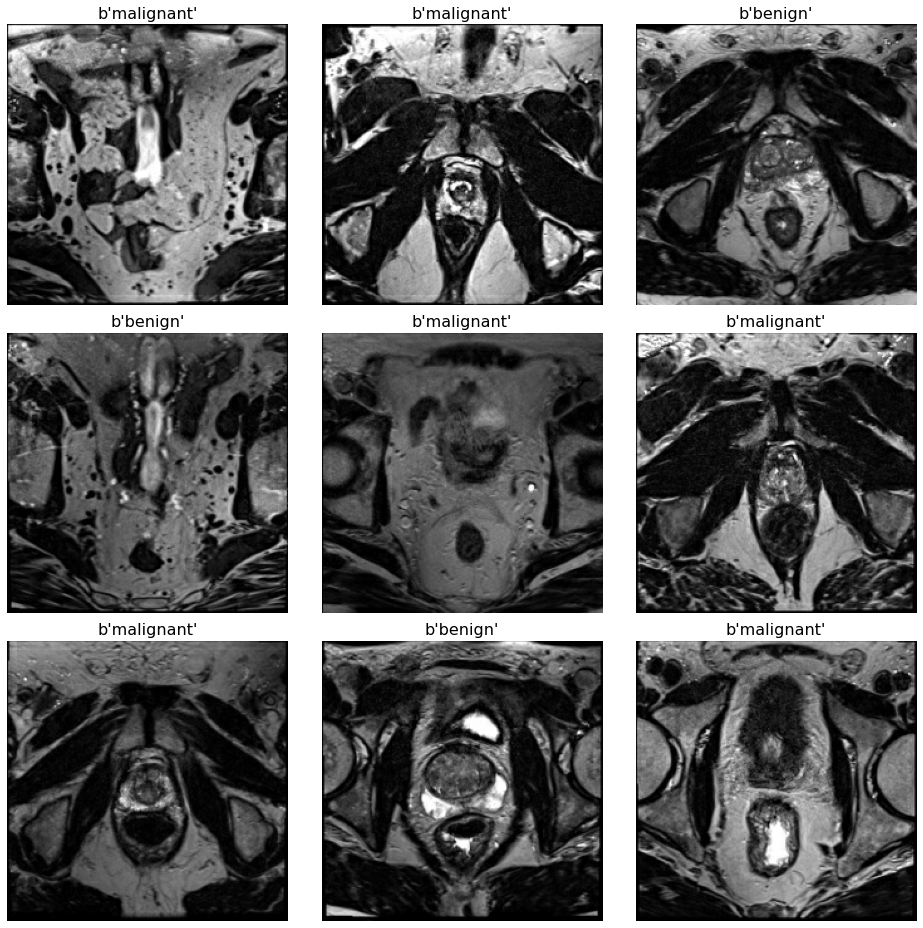

In [ ]:
print(training_filenames)
display_9_images_from_dataset(load_dataset(training_filenames))

['/tmp/prostate_tfrecords/prostate09-525.tfrec', '/tmp/prostate_tfrecords/prostate11-525.tfrec', '/tmp/prostate_tfrecords/prostate13-525.tfrec']


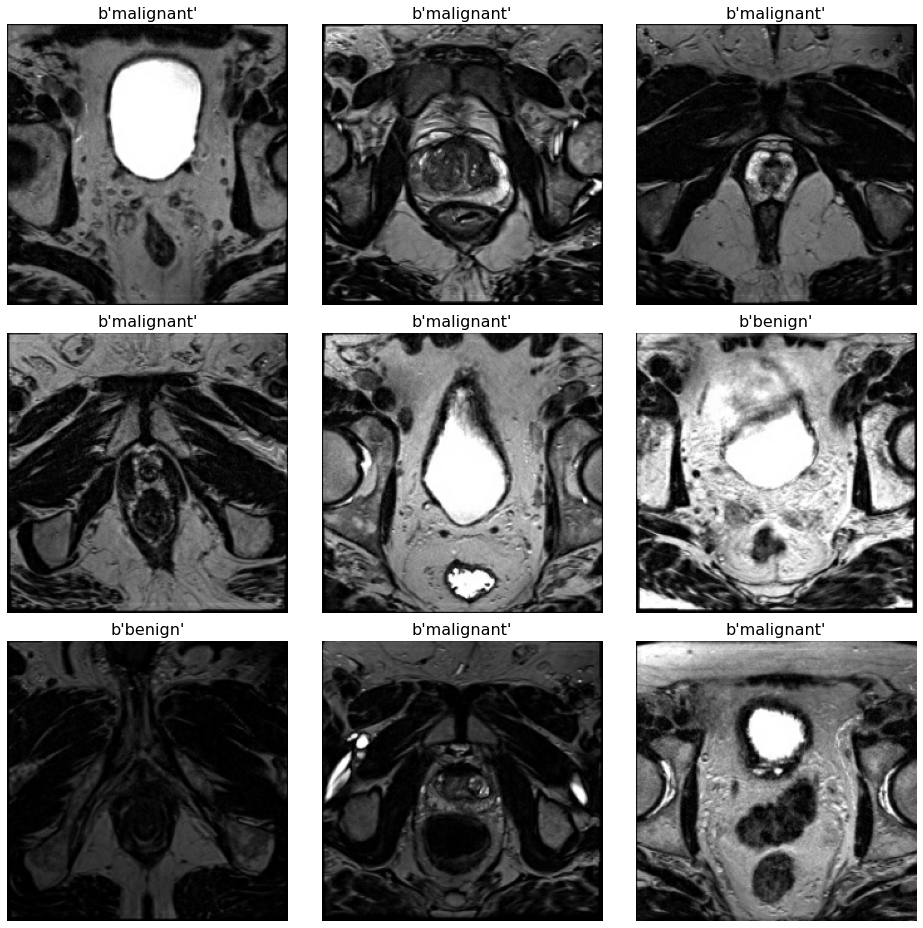

In [ ]:
print(validation_filenames)
display_9_images_from_dataset(load_dataset(validation_filenames))

In [ ]:
def get_batched_dataset(filenames, train=False):
  dataset = load_dataset(filenames)
  dataset = dataset.cache() # This dataset fits in RAM
  if train:
    # Best practices for Keras:
    # Training dataset: repeat then batch
    # Evaluation dataset: do not repeat
    dataset = dataset.repeat()
  dataset = dataset.batch(BATCH_SIZE)
  dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
  # should shuffle too but this dataset was well shuffled on disk already
  return dataset
  

# instantiate the datasets
training_dataset = get_batched_dataset(training_filenames, train=True)
validation_dataset = get_batched_dataset(validation_filenames, train=False)

print(training_dataset)
print(validation_dataset)


<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_DenseNet121 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_DenseNet121.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_DenseNet121.summary()
model_DenseNet121.input_shape

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               12845312  
_________________________________________________________________
dense_19 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_22 (Dense)             (None, 256)              

(None, 224, 224, 3)

In [ ]:
import time

EPOCHS = 20
start_time = time.time()
history = model_DenseNet121.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]
model_DenseNet121_accuracy=round(np.mean(final_accuracy),2)
model_DenseNet121_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(DenseNet121): ", model_DenseNet121_accuracy)
print("TRAINING TIME: ", model_DenseNet121_training_time , " sec")

Epoch 1/20
106/106 [==============================] - 32s 252ms/step - loss: 1.0782 - accuracy: 0.5430 - val_loss: 0.6574 - val_accuracy: 0.5983
Epoch 2/20
106/106 [==============================] - 24s 228ms/step - loss: 0.6240 - accuracy: 0.6548 - val_loss: 0.6697 - val_accuracy: 0.6595
Epoch 3/20
106/106 [==============================] - 24s 226ms/step - loss: 0.5829 - accuracy: 0.7059 - val_loss: 0.7113 - val_accuracy: 0.6042
Epoch 4/20
106/106 [==============================] - 24s 229ms/step - loss: 0.5565 - accuracy: 0.7248 - val_loss: 0.6121 - val_accuracy: 0.6934
Epoch 5/20
106/106 [==============================] - 24s 229ms/step - loss: 0.5028 - accuracy: 0.7684 - val_loss: 0.6023 - val_accuracy: 0.6992
Epoch 6/20
106/106 [==============================] - 24s 227ms/step - loss: 0.4600 - accuracy: 0.7992 - val_loss: 0.5942 - val_accuracy: 0.7285
Epoch 7/20
106/106 [==============================] - 24s 228ms/step - loss: 0.4044 - accuracy: 0.8315 - val_loss: 0.7609 - val_ac

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_MobileNetV2 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_MobileNetV2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_MobileNetV2.summary()
model_MobileNetV2.input_shape

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               32113152  
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

(None, 224, 224, 3)

In [ ]:
import time
start_time = time.time()
history = model_MobileNetV2.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]
model_MobileNetV2_accuracy=round(np.mean(final_accuracy),2)
model_MobileNetV2_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(MobileNetV2): ", model_MobileNetV2_accuracy)
print("TRAINING TIME: ", model_MobileNetV2_training_time , " sec")

Epoch 1/12
106/106 [==============================] - 26s 215ms/step - loss: 1.8613 - accuracy: 0.5273 - val_loss: 0.6639 - val_accuracy: 0.5645
Epoch 2/12
106/106 [==============================] - 22s 207ms/step - loss: 0.6278 - accuracy: 0.6399 - val_loss: 0.6002 - val_accuracy: 0.6471
Epoch 3/12
106/106 [==============================] - 22s 207ms/step - loss: 0.5031 - accuracy: 0.7493 - val_loss: 0.4853 - val_accuracy: 0.7559
Epoch 4/12
106/106 [==============================] - 22s 208ms/step - loss: 0.3626 - accuracy: 0.8356 - val_loss: 0.5668 - val_accuracy: 0.6849
Epoch 5/12
106/106 [==============================] - 22s 207ms/step - loss: 0.3147 - accuracy: 0.8694 - val_loss: 0.5709 - val_accuracy: 0.7259
Epoch 6/12
106/106 [==============================] - 22s 206ms/step - loss: 0.2414 - accuracy: 0.9054 - val_loss: 0.4436 - val_accuracy: 0.8190
Epoch 7/12
106/106 [==============================] - 22s 206ms/step - loss: 0.2176 - accuracy: 0.9135 - val_loss: 0.5955 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


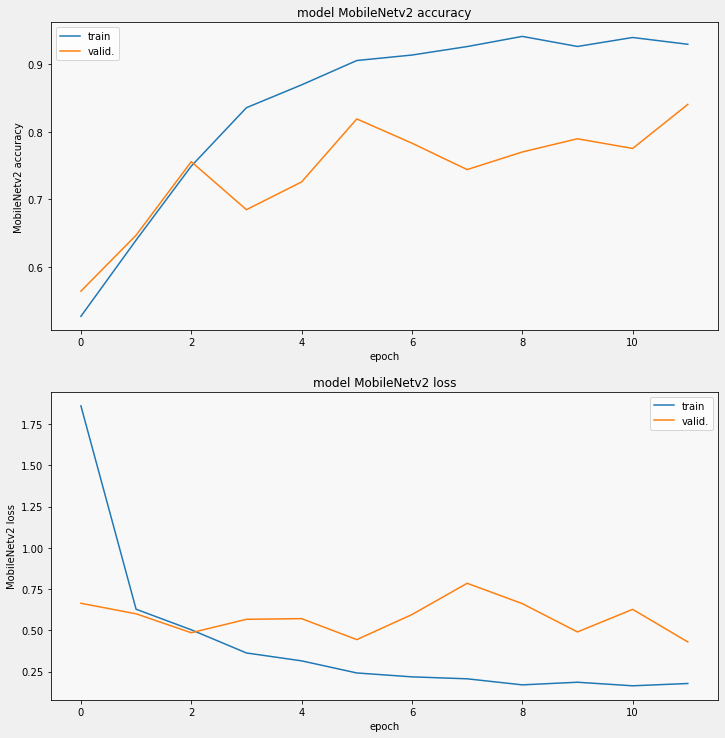

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'MobileNetv2 accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'MobileNetv2 loss', 212)

[b'malignant', b'benign', b'benign', b'benign', b'benign', b'malignant', b'malignant', b'benign', b'malignant']


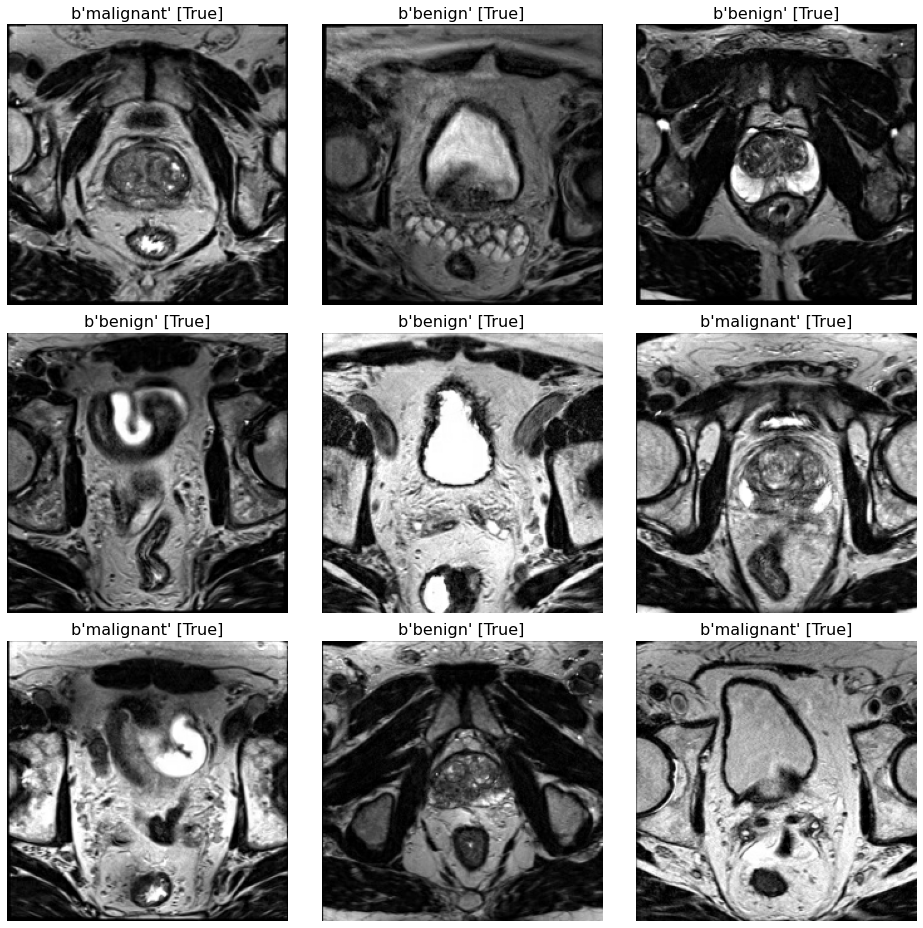

In [ ]:
diseases, labels = dataset_to_numpy_util(load_dataset(validation_filenames).skip(np.random.randint(16)), 9)

predictions = model_MobileNetV2.predict(diseases, steps=1 )
print(np.array(CLASSES)[np.argmax(predictions, axis=-1)].tolist())

display_9_images_with_predictions(diseases, predictions, labels)

In [ ]:
pretrained_model = tf.keras.applications.VGG16(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_VGG16 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512,  activation='relu'),
    tf.keras.layers.Dense(256,  activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(128,  activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(64,  activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(32,  activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_VGG16.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_VGG16.summary()
model_VGG16.input_shape

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              51382272  
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

(None, 224, 224, 3)

In [ ]:
import time
EPOCHS=12
start_time = time.time()
history = model_VGG16.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]


model_VGG16_accuracy=round(np.mean(final_accuracy),2)
model_VGG16_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(VGG16): ", model_VGG16_accuracy)
print("TRAINING TIME: ", model_VGG16_training_time , " sec")

Epoch 1/12
 33/106 [========>.....................] - ETA: 39:36 - loss: 0.9936 - accuracy: 0.4886

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


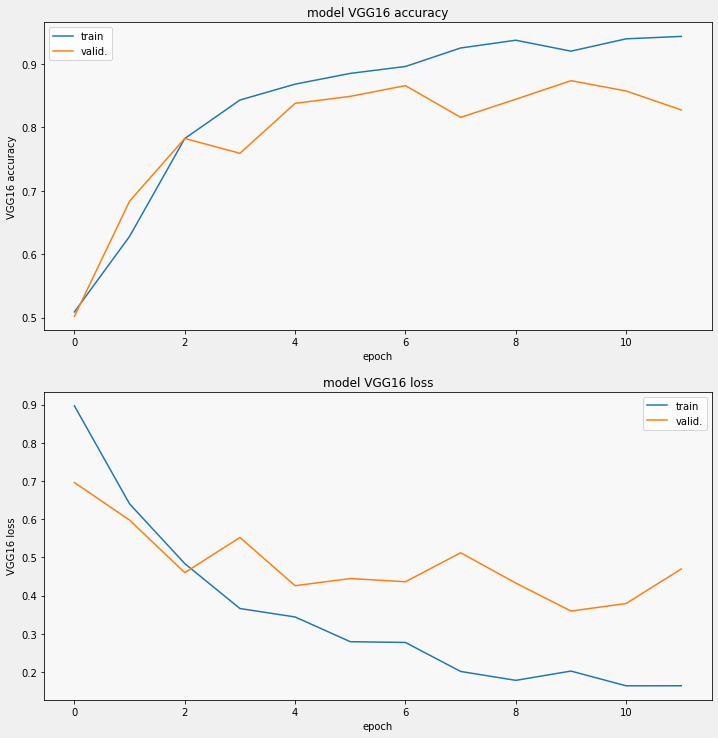

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'VGG16 accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'VGG16 loss', 212)

[b'malignant', b'malignant', b'benign', b'benign', b'malignant', b'malignant', b'malignant', b'benign', b'benign']


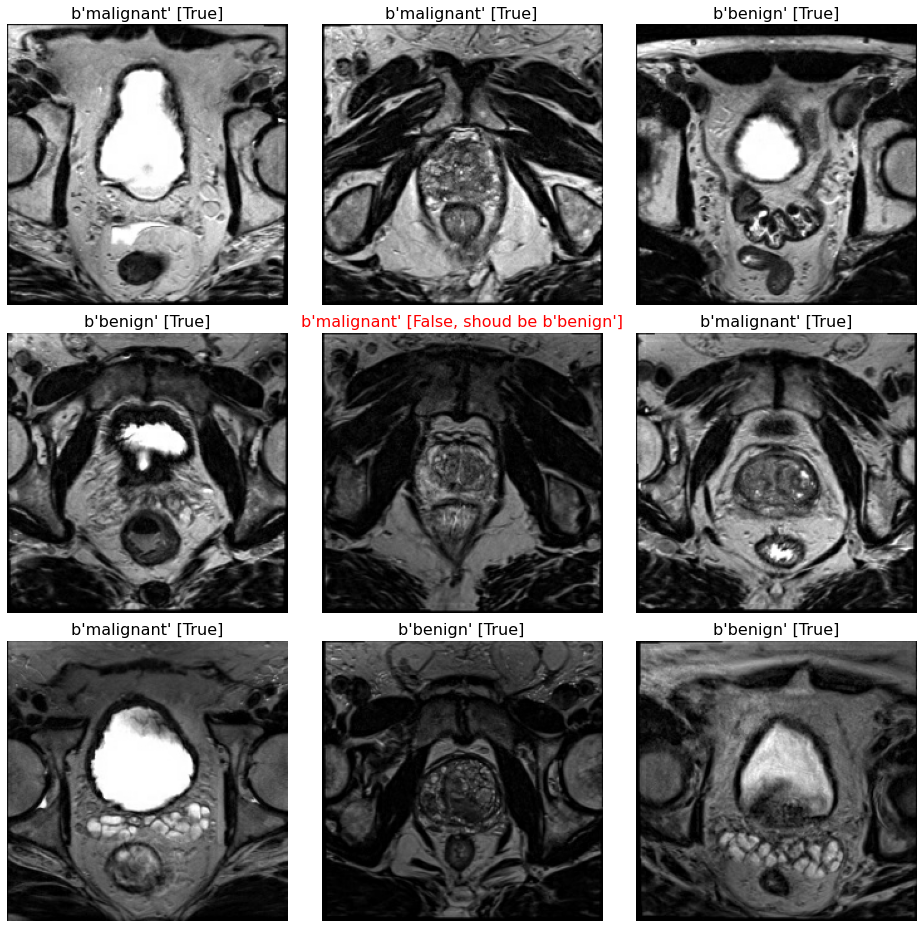

In [ ]:
prostate, labels = dataset_to_numpy_util(load_dataset(validation_filenames).skip(np.random.randint(16)), 9)

predictions = model_VGG16.predict(prostate, steps=1 )
print(np.array(CLASSES)[np.argmax(predictions, axis=-1)].tolist())

display_9_images_with_predictions(prostate, predictions, labels)

In [ ]:
pretrained_model = tf.keras.applications.ResNet50V2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_ResNet50V2 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_ResNet50V2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_ResNet50V2.summary()
model_ResNet50V2.input_shape

94674944/94668760 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 49,255,682
Trainable params: 25,690,882
Non-trainable params: 23,564,800
_________________________________________________________________


(None, 224, 224, 3)

In [ ]:
start_time = time.time()
history = model_ResNet50V2.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]
model_ResNet50V2_accuracy=round(np.mean(final_accuracy),2)
model_ResNet50V2_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(ResNet50V2): ", model_ResNet50V2_accuracy)
print("TRAINING TIME: ", model_ResNet50V2_training_time , " sec")


Epoch 1/12
106/106 [==============================] - 28s 226ms/step - loss: 3.3919 - accuracy: 0.5386 - val_loss: 0.6592 - val_accuracy: 0.6185
Epoch 2/12
106/106 [==============================] - 24s 222ms/step - loss: 0.6501 - accuracy: 0.6249 - val_loss: 0.5927 - val_accuracy: 0.7012
Epoch 3/12
106/106 [==============================] - 23s 217ms/step - loss: 0.5692 - accuracy: 0.6928 - val_loss: 0.5872 - val_accuracy: 0.6966
Epoch 4/12
106/106 [==============================] - 23s 217ms/step - loss: 0.5009 - accuracy: 0.7440 - val_loss: 0.4960 - val_accuracy: 0.7611
Epoch 5/12
106/106 [==============================] - 23s 220ms/step - loss: 0.4407 - accuracy: 0.7771 - val_loss: 0.4761 - val_accuracy: 0.7806
Epoch 6/12
106/106 [==============================] - 23s 219ms/step - loss: 0.4303 - accuracy: 0.7922 - val_loss: 0.4524 - val_accuracy: 0.7852
Epoch 7/12
106/106 [==============================] - 23s 218ms/step - loss: 0.3967 - accuracy: 0.8010 - val_loss: 0.4270 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


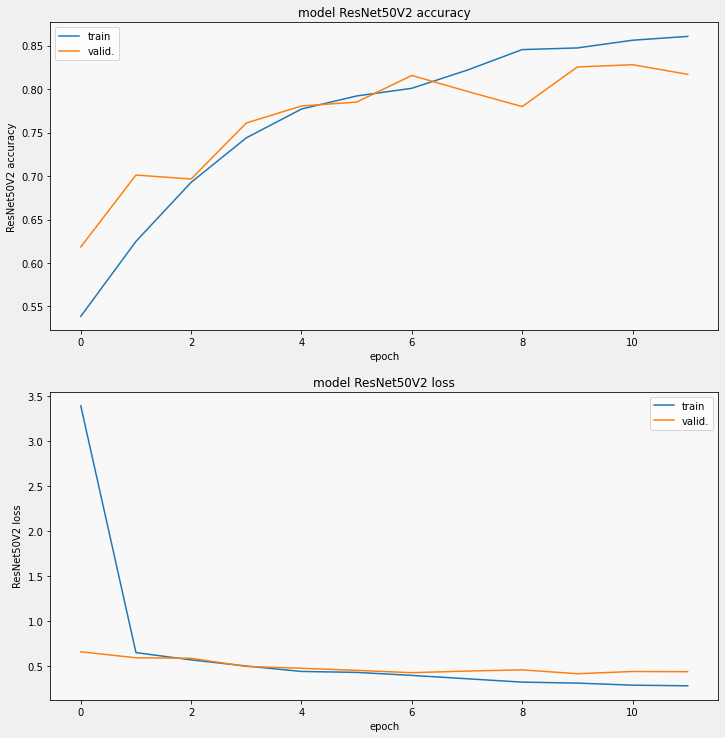

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'ResNet50V2 accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'ResNet50V2 loss', 212)

In [ ]:
pretrained_model = tf.keras.applications.ResNet101V2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_ResNet101V2 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_ResNet101V2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_ResNet101V2.summary()
model_ResNet101V2.input_shape

171319296/171317808 [==============================] - 2s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 514       
Total params: 68,317,442
Trainable params: 25,690,882
Non-trainable params: 42,626,560
_________________________________________________________________


(None, 224, 224, 3)

In [ ]:
start_time = time.time()
history = model_ResNet101V2.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]
model_ResNet101V2_accuracy=round(np.mean(final_accuracy),2)
model_ResNet101V2_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(ResNet101V2): ", model_ResNet101V2_accuracy)
print("TRAINING TIME: ", model_ResNet101V2_training_time , " sec")

Epoch 1/12
106/106 [==============================] - 46s 392ms/step - loss: 3.4691 - accuracy: 0.4997 - val_loss: 0.6921 - val_accuracy: 0.4766
Epoch 2/12
106/106 [==============================] - 39s 372ms/step - loss: 0.6939 - accuracy: 0.5189 - val_loss: 0.6835 - val_accuracy: 0.5645
Epoch 3/12
106/106 [==============================] - 39s 373ms/step - loss: 0.6759 - accuracy: 0.5506 - val_loss: 0.6603 - val_accuracy: 0.6178
Epoch 4/12
106/106 [==============================] - 40s 374ms/step - loss: 0.6547 - accuracy: 0.5712 - val_loss: 0.6639 - val_accuracy: 0.6087
Epoch 5/12
106/106 [==============================] - 39s 373ms/step - loss: 0.6476 - accuracy: 0.5893 - val_loss: 0.6424 - val_accuracy: 0.6380
Epoch 6/12
106/106 [==============================] - 40s 374ms/step - loss: 0.6299 - accuracy: 0.6100 - val_loss: 0.6340 - val_accuracy: 0.6699
Epoch 7/12
106/106 [==============================] - 40s 374ms/step - loss: 0.6247 - accuracy: 0.6223 - val_loss: 0.6177 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


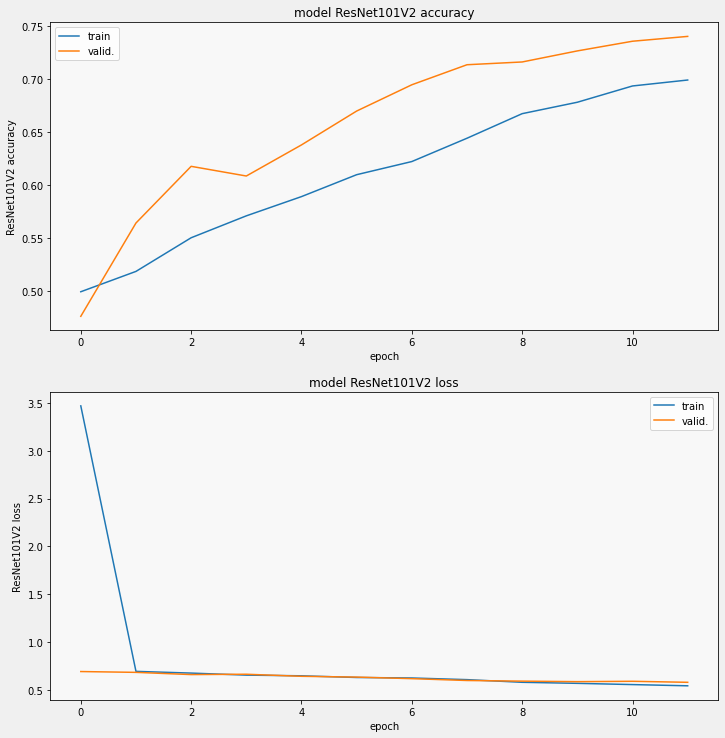

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'ResNet101V2 accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'ResNet101V2 loss', 212)

In [ ]:
pretrained_model = tf.keras.applications.ResNet152V2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_ResNet152V2 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512,  activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(256,  activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(128,  activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(64,  activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_ResNet152V2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_ResNet152V2.summary()
model_ResNet152V2.input_shape

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_6 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_40 (Dense)             (None, 2048)              205522944 
_________________________________________________________________
dense_41 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_42 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)              

(None, 224, 224, 3)

In [ ]:
EPOCHS = 12
start_time = time.time()
history = model_ResNet152V2.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]

model_ResNet152V2_accuracy=round(np.mean(final_accuracy),2)
model_ResNet152V2_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(ResNet152V2): ", model_ResNet152V2_accuracy)
print("TRAINING TIME: ", model_ResNet152V2_training_time , " sec")

Epoch 1/12
106/106 [==============================] - 68s 575ms/step - loss: 1.9242 - accuracy: 0.5009 - val_loss: 0.6983 - val_accuracy: 0.5130
Epoch 2/12
106/106 [==============================] - 60s 565ms/step - loss: 0.6505 - accuracy: 0.6150 - val_loss: 0.5547 - val_accuracy: 0.7272
Epoch 3/12
106/106 [==============================] - 61s 580ms/step - loss: 0.3990 - accuracy: 0.8203 - val_loss: 0.6083 - val_accuracy: 0.7786
Epoch 4/12
106/106 [==============================] - 62s 585ms/step - loss: 0.2633 - accuracy: 0.8971 - val_loss: 0.7415 - val_accuracy: 0.7493
Epoch 5/12
106/106 [==============================] - 62s 583ms/step - loss: 0.1770 - accuracy: 0.9415 - val_loss: 0.5323 - val_accuracy: 0.8151
Epoch 6/12
106/106 [==============================] - 62s 586ms/step - loss: 0.1789 - accuracy: 0.9346 - val_loss: 0.5742 - val_accuracy: 0.7630
Epoch 7/12
106/106 [==============================] - 62s 586ms/step - loss: 0.1655 - accuracy: 0.9390 - val_loss: 0.5965 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


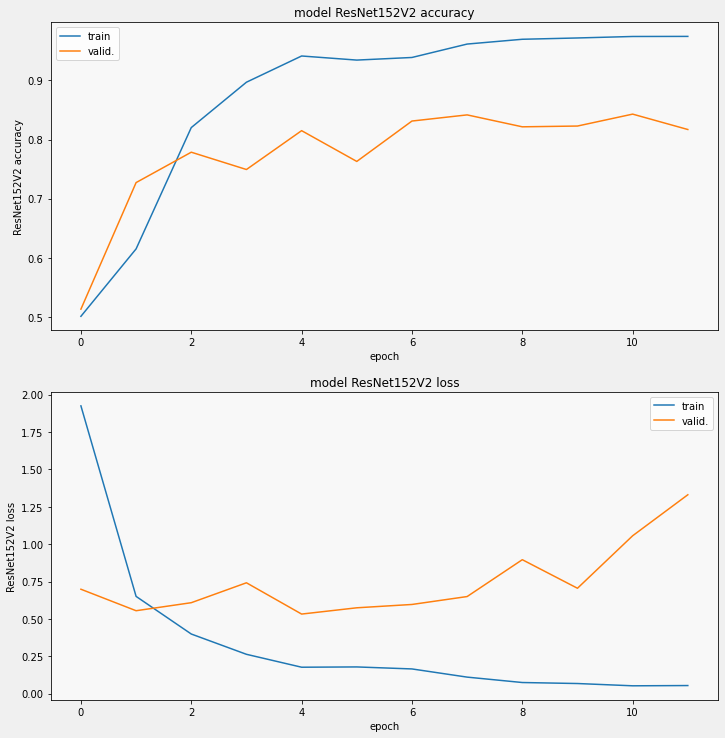

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'ResNet152V2 accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'ResNet152V2 loss', 212)

In [ ]:
pretrained_model = tf.keras.applications.Xception(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_Xception = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_Xception.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_Xception.summary()
model_Xception.input_shape

83689472/83683744 [==============================] - 1s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_5 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 514       
Total params: 46,552,362
Trainable params: 25,690,882
Non-trainable params: 20,861,480
_________________________________________________________________


(None, 224, 224, 3)

In [ ]:
start_time = time.time()
history = model_Xception.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]

model_Xception_accuracy=round(np.mean(final_accuracy),2)
model_Xception_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(Xception): ", model_Xception_accuracy)
print("TRAINING TIME: ", model_Xception_training_time , " sec")

Epoch 1/12
106/106 [==============================] - 43s 372ms/step - loss: 2.8452 - accuracy: 0.5053 - val_loss: 0.6931 - val_accuracy: 0.4753
Epoch 2/12
106/106 [==============================] - 39s 367ms/step - loss: 0.6947 - accuracy: 0.5084 - val_loss: 0.6934 - val_accuracy: 0.4753
Epoch 3/12
106/106 [==============================] - 39s 366ms/step - loss: 0.6933 - accuracy: 0.5056 - val_loss: 0.6935 - val_accuracy: 0.4753
Epoch 4/12
106/106 [==============================] - 39s 366ms/step - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6936 - val_accuracy: 0.4746
Epoch 5/12
106/106 [==============================] - 39s 368ms/step - loss: 0.6930 - accuracy: 0.5055 - val_loss: 0.6936 - val_accuracy: 0.4746
Epoch 6/12
106/106 [==============================] - 39s 368ms/step - loss: 0.6929 - accuracy: 0.5059 - val_loss: 0.6934 - val_accuracy: 0.4759
Epoch 7/12
106/106 [==============================] - 39s 368ms/step - loss: 0.6925 - accuracy: 0.5075 - val_loss: 0.6890 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


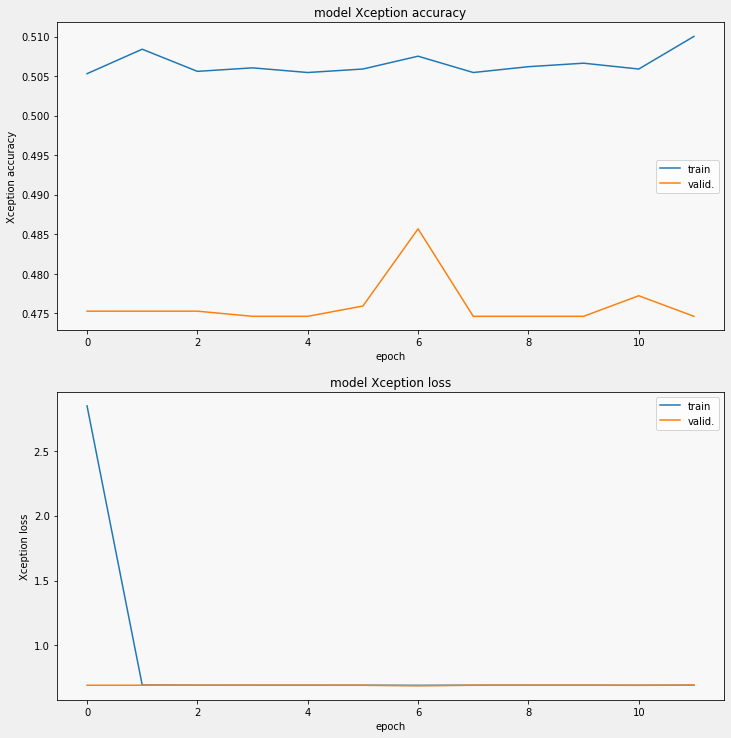

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'Xception accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'Xception loss', 212)

In [ ]:
pretrained_model = tf.keras.applications.VGG19(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_VGG19 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_VGG19.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_VGG19.summary()
model_VGG19.input_shape

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 514       
Total params: 26,447,682
Trainable params: 6,423,298
Non-trainable params: 20,024,384
_________________________________________________________________


(None, 224, 224, 3)

In [ ]:
start_time = time.time()
history = model_VGG19.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]

model_VGG19_accuracy=round(np.mean(final_accuracy),2)
model_VGG19_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(VGG19): ", model_VGG19_accuracy)
print("TRAINING TIME: ", model_VGG19_training_time , " sec")

Epoch 1/12
106/106 [==============================] - 43s 401ms/step - loss: 0.9510 - accuracy: 0.5697 - val_loss: 0.6506 - val_accuracy: 0.6706
Epoch 2/12
106/106 [==============================] - 41s 389ms/step - loss: 0.6354 - accuracy: 0.6310 - val_loss: 0.5977 - val_accuracy: 0.6973
Epoch 3/12
106/106 [==============================] - 42s 393ms/step - loss: 0.5827 - accuracy: 0.6910 - val_loss: 0.5476 - val_accuracy: 0.7344
Epoch 4/12
106/106 [==============================] - 42s 393ms/step - loss: 0.5726 - accuracy: 0.6792 - val_loss: 0.5452 - val_accuracy: 0.7428
Epoch 5/12
106/106 [==============================] - 41s 392ms/step - loss: 0.5475 - accuracy: 0.7008 - val_loss: 0.5583 - val_accuracy: 0.7546
Epoch 6/12
106/106 [==============================] - 42s 394ms/step - loss: 0.5491 - accuracy: 0.7087 - val_loss: 0.4882 - val_accuracy: 0.7676
Epoch 7/12
106/106 [==============================] - 42s 392ms/step - loss: 0.5068 - accuracy: 0.7302 - val_loss: 0.4751 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


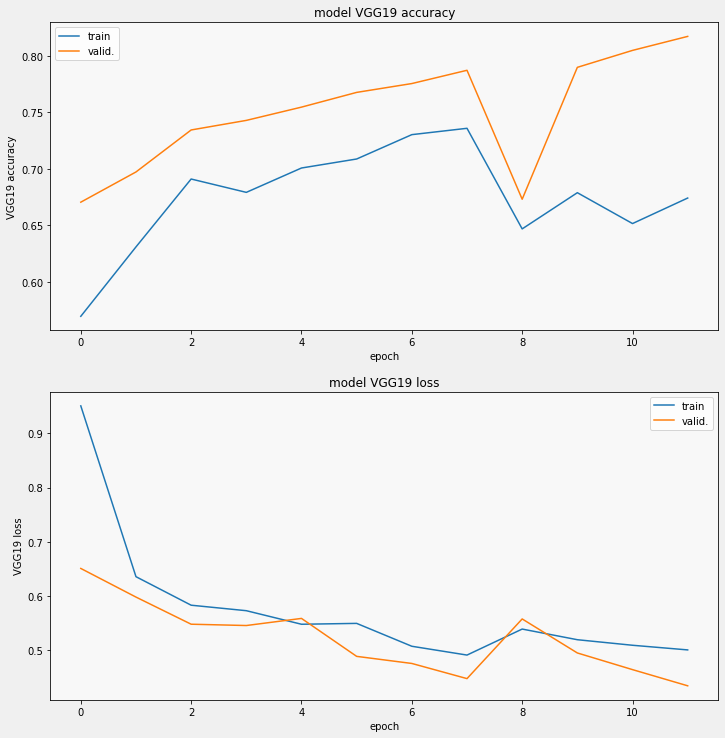

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'VGG19 accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'VGG19 loss', 212)

In [ ]:
pretrained_model = tf.keras.applications.InceptionResNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_InceptionResNetV2 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_InceptionResNetV2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_InceptionResNetV2.summary()
model_InceptionResNetV2.input_shape

219062272/219055592 [==============================] - 2s 0us/step
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_7 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               9830656   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 514       
Total params: 64,167,906
Trainable params: 9,831,170
Non-trainable params: 54,336,736
_________________________________________________________________


(None, 224, 224, 3)

In [ ]:
start_time = time.time()
history = model_InceptionResNetV2.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]

model_InceptionResNetV2_accuracy=round(np.mean(final_accuracy),2)
model_InceptionResNetV2_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(InceptionResNetV2): ", model_InceptionResNetV2_accuracy)
print("TRAINING TIME: ", model_InceptionResNetV2_training_time , " sec")

Epoch 1/12
106/106 [==============================] - 57s 442ms/step - loss: 2.7167 - accuracy: 0.5069 - val_loss: 0.6865 - val_accuracy: 0.5540
Epoch 2/12
106/106 [==============================] - 43s 405ms/step - loss: 0.6902 - accuracy: 0.5251 - val_loss: 0.6898 - val_accuracy: 0.5605
Epoch 3/12
106/106 [==============================] - 43s 409ms/step - loss: 0.6923 - accuracy: 0.5239 - val_loss: 0.6942 - val_accuracy: 0.4746
Epoch 4/12
106/106 [==============================] - 43s 407ms/step - loss: 0.6932 - accuracy: 0.5056 - val_loss: 0.6939 - val_accuracy: 0.4746
Epoch 5/12
106/106 [==============================] - 43s 408ms/step - loss: 0.6945 - accuracy: 0.5050 - val_loss: 0.6937 - val_accuracy: 0.4746
Epoch 6/12
106/106 [==============================] - 43s 408ms/step - loss: 0.6928 - accuracy: 0.5057 - val_loss: 0.6921 - val_accuracy: 0.4746
Epoch 7/12
106/106 [==============================] - 43s 408ms/step - loss: 0.6921 - accuracy: 0.4953 - val_loss: 0.6931 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


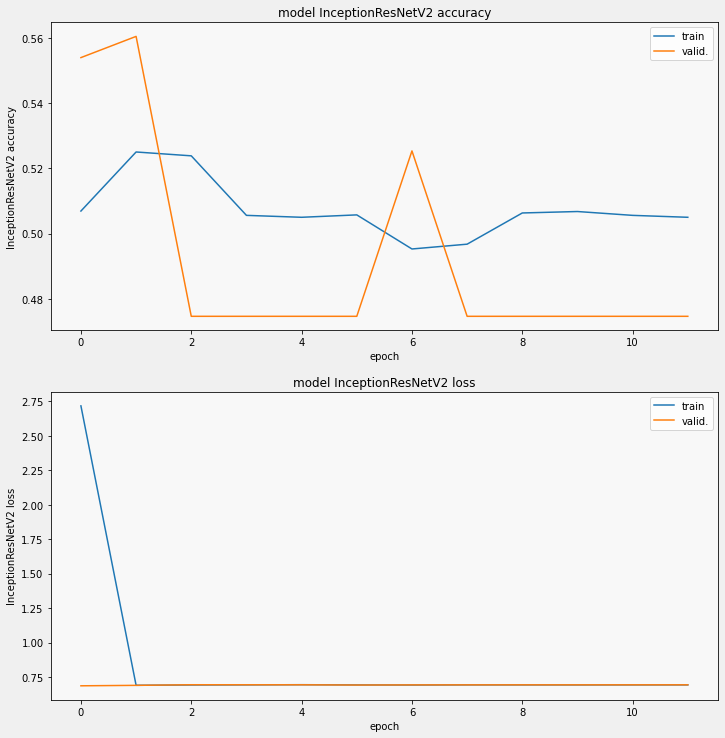

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'InceptionResNetV2 accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'InceptionResNetV2 loss', 212)

In [ ]:
pretrained_model = tf.keras.applications.InceptionV3(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model_InceptionV3 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NO_OF_CLASSES, activation='softmax')
])

model_InceptionV3.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_InceptionV3.summary()
model_InceptionV3.input_shape

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_8 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               13107456  
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 514       
Total params: 34,910,754
Trainable params: 13,107,970
Non-trainable params: 21,802,784
_________________________________________________________________


(None, 224, 224, 3)

In [ ]:
start_time = time.time()
history = model_InceptionV3.fit(training_dataset.repeat(), steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_dataset.repeat(), validation_steps=validation_steps, shuffle=True)
final_accuracy = history.history["val_accuracy"][-5:]

model_InceptionV3_accuracy=round(np.mean(final_accuracy),2)
model_InceptionV3_training_time= round((time.time() - start_time),2)
print("FINAL ACCURACY MEAN(InceptionV3): ", model_InceptionV3_accuracy)
print("TRAINING TIME: ", model_InceptionV3_training_time , " sec")

Epoch 1/12
106/106 [==============================] - 26s 199ms/step - loss: 2.3962 - accuracy: 0.5165 - val_loss: 0.6804 - val_accuracy: 0.5866
Epoch 2/12
106/106 [==============================] - 19s 175ms/step - loss: 0.6836 - accuracy: 0.5494 - val_loss: 0.6720 - val_accuracy: 0.6087
Epoch 3/12
106/106 [==============================] - 18s 173ms/step - loss: 0.6723 - accuracy: 0.5712 - val_loss: 0.6544 - val_accuracy: 0.6406
Epoch 4/12
106/106 [==============================] - 18s 171ms/step - loss: 0.6829 - accuracy: 0.5374 - val_loss: 0.6968 - val_accuracy: 0.4759
Epoch 5/12
106/106 [==============================] - 18s 171ms/step - loss: 0.6745 - accuracy: 0.5528 - val_loss: 0.6457 - val_accuracy: 0.6380
Epoch 6/12
106/106 [==============================] - 18s 173ms/step - loss: 0.6666 - accuracy: 0.5713 - val_loss: 0.6557 - val_accuracy: 0.6107
Epoch 7/12
106/106 [==============================] - 18s 173ms/step - loss: 0.6466 - accuracy: 0.6036 - val_loss: 0.6379 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


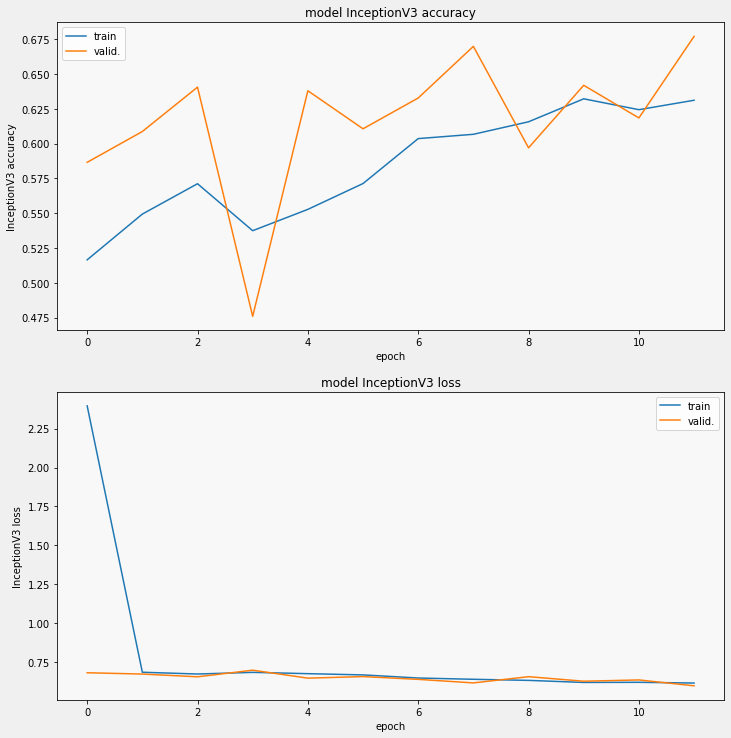

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'InceptionV3 accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'InceptionV3 loss', 212)

In [ ]:
training_details = [ 
        { 
        "Model": [{"Accuracy": model_MobileNetV2_accuracy, "Training Time": model_MobileNetV2_training_time} 
                   ], 
        "Name": "MobileNetV2"
        }, 
        { 
        "Model": [{"Accuracy": model_ResNet50V2_accuracy, "Training Time": model_ResNet50V2_training_time}                    
                  ], 
        "Name": "ResNet50V2"
        },
        { 
        "Model": [{"Accuracy": model_ResNet101V2_accuracy, "Training Time": model_ResNet101V2_training_time}                    
                  ], 
        "Name": "ResNet101V2"
        },
        { 
        "Model": [{"Accuracy": model_ResNet152V2_accuracy, "Training Time": model_ResNet152V2_training_time}                    
                  ], 
        "Name": "ResNet152V2"
        },
        { 
        "Model": [{"Accuracy": model_Xception_accuracy, "Training Time": model_Xception_training_time}                    
                  ], 
        "Name": "Xception"
        },
        { 
        "Model": [{"Accuracy": model_VGG16_accuracy, "Training Time": model_VGG16_training_time}                    
                  ], 
        "Name": "VGG16"
        },
        { 
        "Model": [{"Accuracy": model_VGG19_accuracy, "Training Time": model_VGG19_training_time}                    
                  ], 
        "Name": "VGG19"
        },
        { 
        "Model": [{"Accuracy": model_InceptionResNetV2_accuracy, "Training Time": model_InceptionResNetV2_training_time}                    
                  ], 
        "Name": "InceptionResNetV2"
        },
        { 
        "Model": [{"Accuracy": model_InceptionV3_accuracy, "Training Time": model_InceptionV3_training_time}                    
                  ], 
        "Name": "InceptionV3"
        }
       ] 

In [ ]:
training_details

[{'Model': [{'Accuracy': 0.75, 'Training Time': 161.14}],
  'Name': 'MobileNetV2'},
 {'Model': [{'Accuracy': 0.81, 'Training Time': 282.49}],
  'Name': 'ResNet50V2'},
 {'Model': [{'Accuracy': 0.73, 'Training Time': 506.63}],
  'Name': 'ResNet101V2'},
 {'Model': [{'Accuracy': 0.82, 'Training Time': 700.81}],
  'Name': 'ResNet152V2'},
 {'Model': [{'Accuracy': 0.48, 'Training Time': 503.93}], 'Name': 'Xception'},
 {'Model': [{'Accuracy': 0.81, 'Training Time': 442.41}], 'Name': 'VGG16'},
 {'Model': [{'Accuracy': 0.77, 'Training Time': 502.47}], 'Name': 'VGG19'},
 {'Model': [{'Accuracy': 0.47, 'Training Time': 569.91}],
  'Name': 'InceptionResNetV2'},
 {'Model': [{'Accuracy': 0.64, 'Training Time': 265.21}],
  'Name': 'InceptionV3'}]

In [ ]:
#For SKLEARN
model_VGG16.save('/content/drive/MyDrive/dataset/sk1_mri_model_VGG16_Prostate.h5')
model_ResNet152V2.save('/content/drive/MyDrive/dataset/sk1_mri_ResNet152V2_Prostate.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model_MobileNetV2.save('/content/drive/MyDrive/dataset/ext_mri_MobileNetV2_Prostate.h5')
model_ResNet50V2.save('/content/drive/MyDrive/dataset/ext_mri_ResNet50V2_Prostate.h5')
model_ResNet101V2.save('/content/drive/MyDrive/dataset/ext_mri_ResNet101V2_Prostate.h5')
model_ResNet152V2.save('/content/drive/MyDrive/dataset/ext_mri_ResNet152V2_Prostate.h5')
model_InceptionResNetV2.save('/content/drive/MyDrive/dataset/ext_mri_InceptionResNetV2_Prostate.h5')
model_InceptionV3.save('/content/drive/MyDrive/dataset/ext_mri_InceptionV3_Prostate.h5')
model_Xception.save('/content/drive/MyDrive/dataset/ext_mri_model_Xception_Prostate.h5')
model_VGG16.save('/content/drive/MyDrive/dataset/ext_mri_model_VGG16_Prostate.h5')
model_VGG19.save('/content/drive/MyDrive/dataset/ext_mri_model_VGG19_Prostate.h5')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model_name=['MobileNetV2', 'ResNet50V2','ResNet101V2','ResNet152V2','Xception','VGG16','VGG19','InceptionResNetV2','InceptionV3']
model_accuracy=[model_MobileNetV2_accuracy, model_ResNet50V2_accuracy ,model_ResNet101V2_accuracy,model_ResNet152V2_accuracy,model_Xception_accuracy,model_VGG16_accuracy,model_VGG19_accuracy,model_InceptionResNetV2_accuracy,model_InceptionV3_accuracy]
model_training_time=[model_MobileNetV2_training_time,model_ResNet50V2_training_time,model_ResNet101V2_training_time,model_ResNet152V2_training_time,model_Xception_training_time,model_VGG16_training_time,model_VGG19_training_time,model_InceptionResNetV2_training_time,model_InceptionV3_training_time]

In [ ]:
import pandas as pd 

df = pd.DataFrame(list(zip(model_name, model_accuracy,model_training_time )), 
               columns =['Model Name', 'Accuracy', 'Training Time']) 
df 

Model Name  Accuracy  Training Time
0        MobileNetV2      0.75         161.14
1         ResNet50V2      0.81         282.49
2        ResNet101V2      0.73         506.63
3        ResNet152V2      0.82         700.81
4           Xception      0.48         503.93
5              VGG16      0.81         442.41
6              VGG19      0.77         502.47
7  InceptionResNetV2      0.47         569.91
8        InceptionV3      0.64         265.21

In [ ]:
df['Training Time'] = np.log(df['Training Time'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

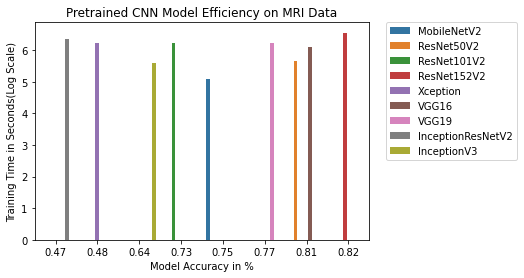

In [ ]:
ax=sns.barplot(y="Training Time", x="Accuracy", hue="Model Name", data=df)
ax.set_title('Pretrained CNN Model Efficiency on MRI Data')
ax.set_ylabel('Training Time in Seconds(Log Scale)')
ax.set_xlabel('Model Accuracy in %')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)